In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [3810]:
df = pd.read_csv('loan_data_set.csv')

In [3811]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3813]:
df.columns[df.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\3927174524.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="crest")


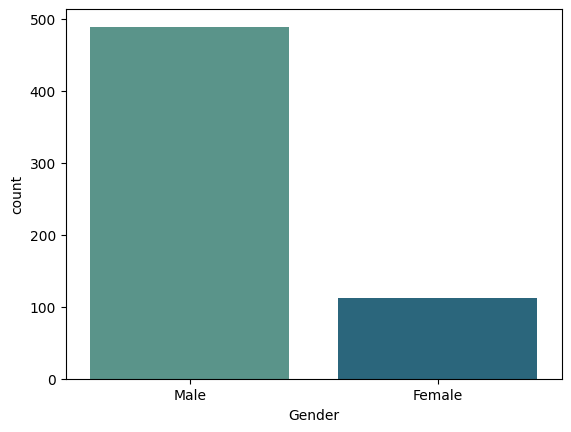

In [3814]:
sns.countplot(x="Gender", data=df, palette="crest")
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\4141262993.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="crest")


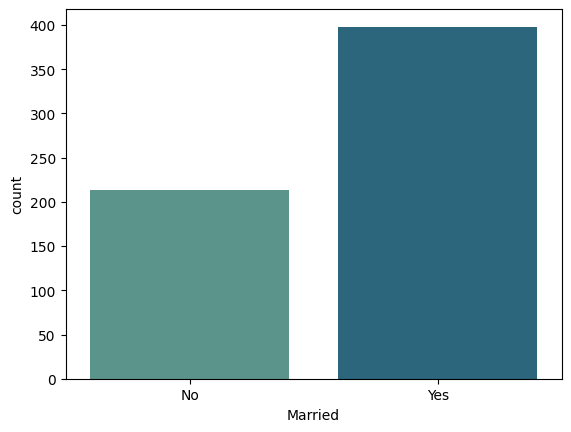

In [3815]:
sns.countplot(x="Married", data=df, palette="crest")
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\2700476012.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="crest")


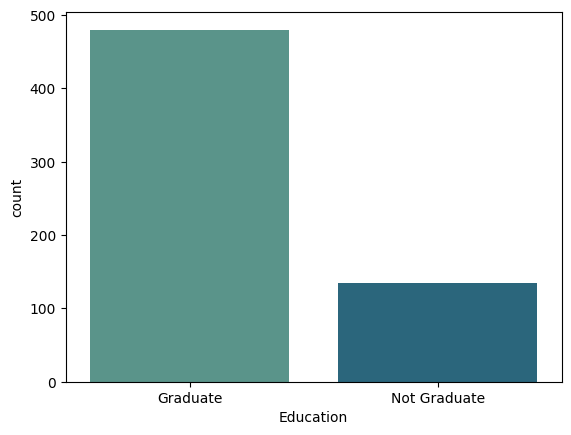

In [3816]:
sns.countplot(x="Education", data=df, palette="crest")
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\1963651902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


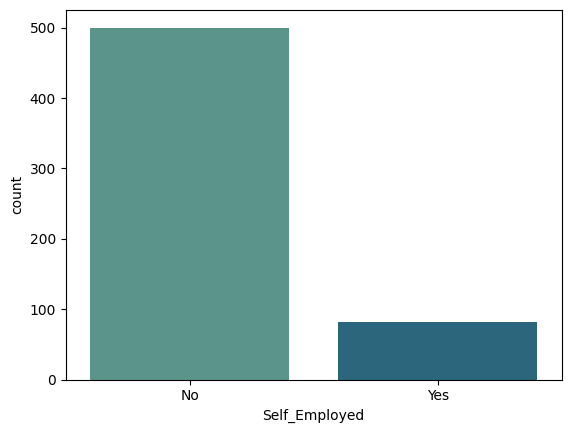

In [3817]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\2548569835.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="crest")


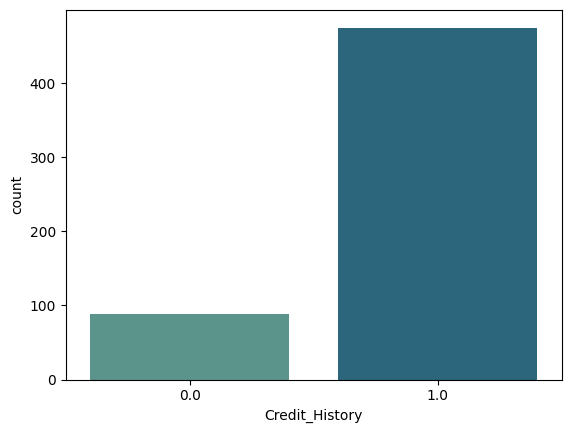

In [3818]:
sns.countplot(x="Credit_History", data=df, palette="crest")
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\1705737722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="crest")


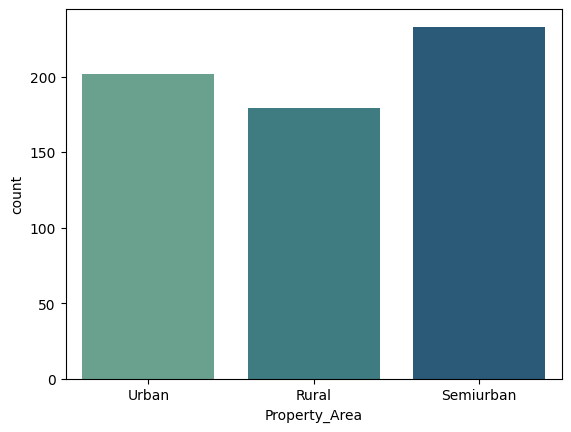

In [3819]:
sns.countplot(x="Property_Area", data=df, palette="crest")
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\1036816714.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=df, palette="crest")


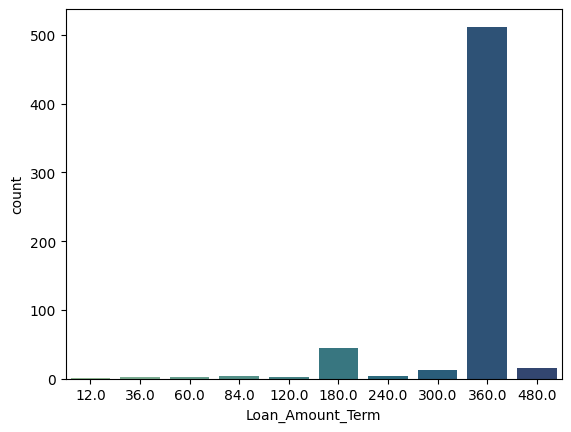

In [3820]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="crest")
plt.show()    

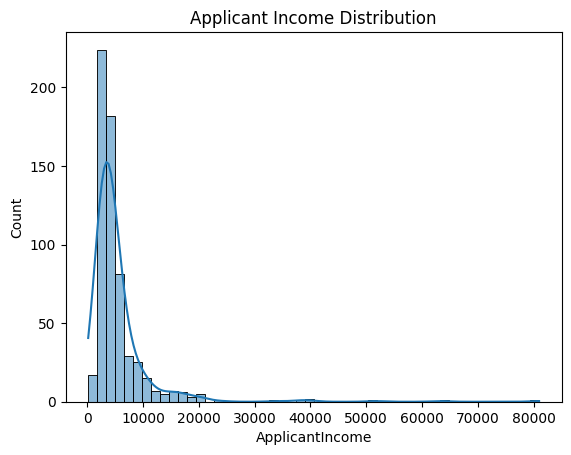

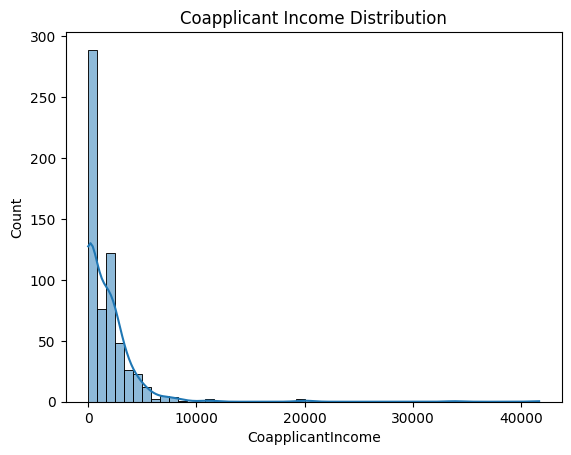

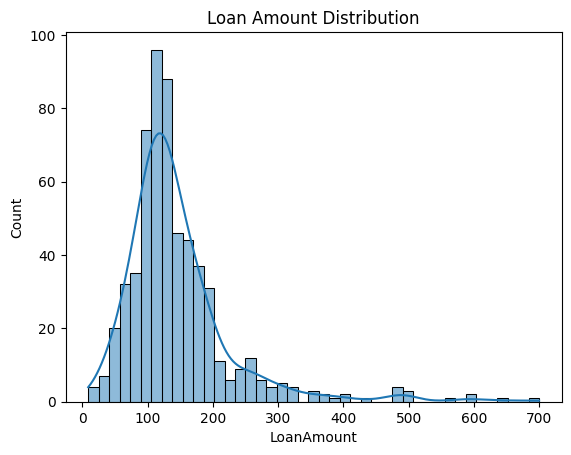

In [3821]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.show()

sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title("Coapplicant Income Distribution")
plt.show()

sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

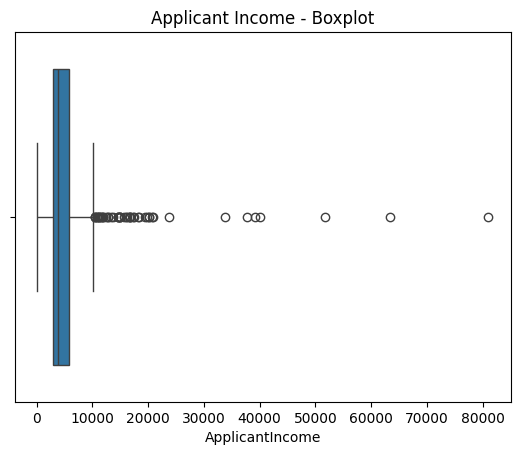

In [3822]:
sns.boxplot(x=df['ApplicantIncome'])
plt.title("Applicant Income - Boxplot")
plt.show()

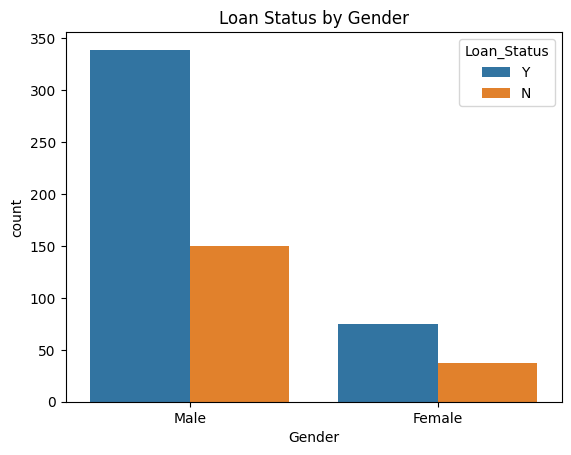

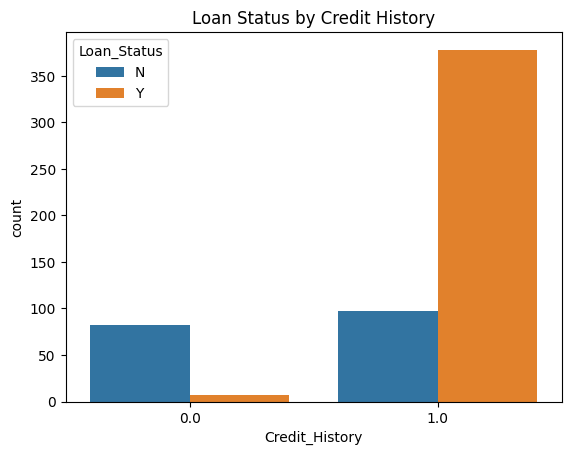

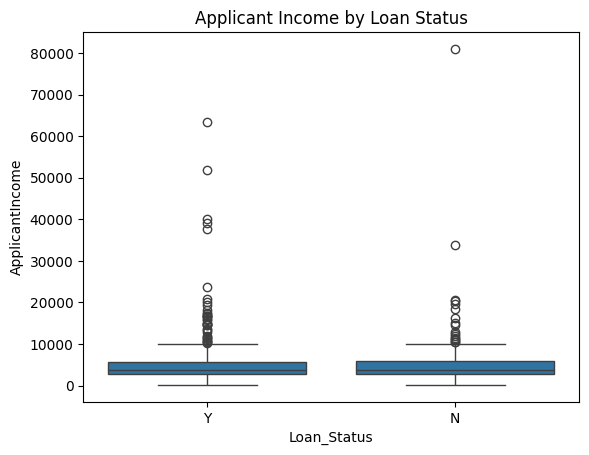

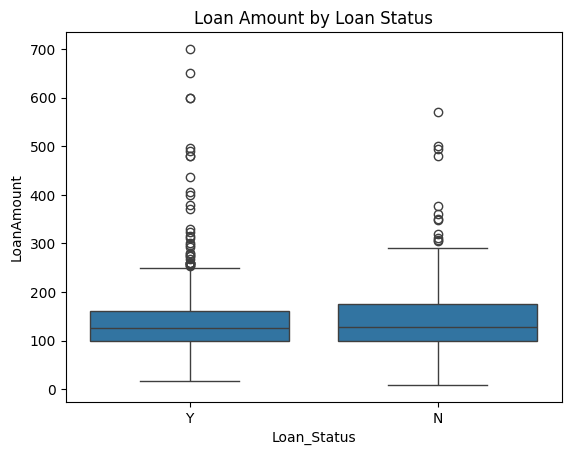

In [3823]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title("Loan Status by Gender")
plt.show()

sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status by Credit History")
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Loan Status")
plt.show()

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("Loan Amount by Loan Status")
plt.show()


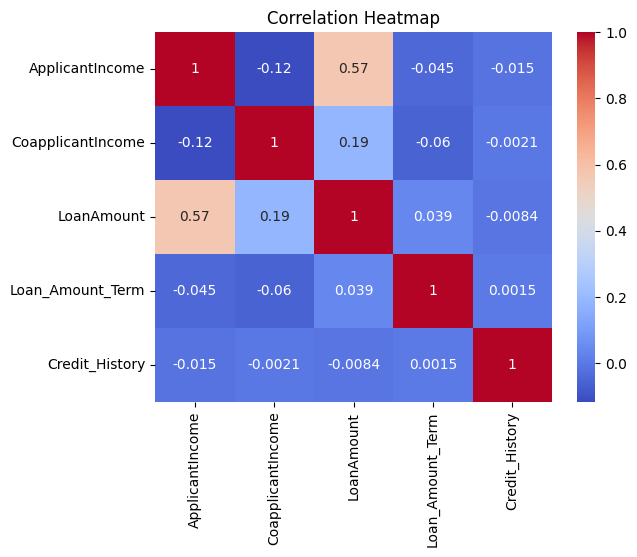

In [3824]:
numerical = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
corr = numerical.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [3825]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3826]:
df.drop('Loan_ID', axis=1, inplace=True)

categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History','Loan_Amount_Term']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


C:\Users\abdel\AppData\Local\Temp\ipykernel_17612\438623603.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [3827]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3828]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)


In [3829]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    bool   
 6   Married                  614 non-null    bool   
 7   Dependents_0             614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education                614 non-null    bool   
 12  Self_Employed            614 non-null    bool   
 13  Property_Area_Rural      614 non-null    bool   
 14  Property_Area_Semiurban  6

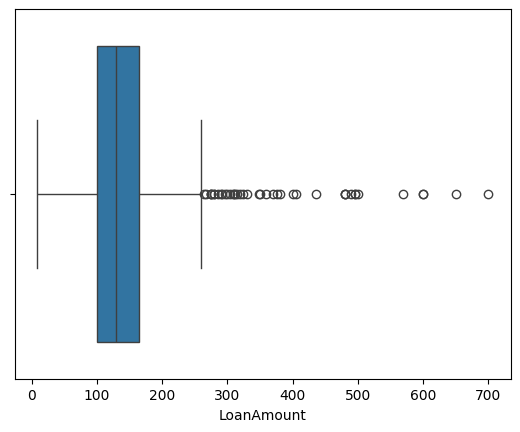

In [3830]:

sns.boxplot(x=df['LoanAmount'])
plt.show()


In [3831]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [3832]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 612
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          396 non-null    int64  
 1   CoapplicantIncome        396 non-null    float64
 2   LoanAmount               396 non-null    float64
 3   Loan_Amount_Term         396 non-null    float64
 4   Credit_History           396 non-null    float64
 5   Gender                   396 non-null    bool   
 6   Married                  396 non-null    bool   
 7   Dependents_0             396 non-null    bool   
 8   Dependents_1             396 non-null    bool   
 9   Dependents_2             396 non-null    bool   
 10  Dependents_3+            396 non-null    bool   
 11  Education                396 non-null    bool   
 12  Self_Employed            396 non-null    bool   
 13  Property_Area_Rural      396 non-null    bool   
 14  Property_Area_Semiurban  396 no

In [3833]:
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].min())


ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             9.0
dtype: float64


In [3834]:
print("Skewness :")
print("ApplicantIncome:", df['ApplicantIncome'].skew())
print("CoapplicantIncome:", df['CoapplicantIncome'].skew())
print("LoanAmount:", df['LoanAmount'].skew())

Skewness :
ApplicantIncome: 1.1301032206755588
CoapplicantIncome: 0.8259760545693466
LoanAmount: 0.4382302868414873


In [3835]:

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

In [3836]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [3837]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(random_state=42).fit_resample(X, y)

X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


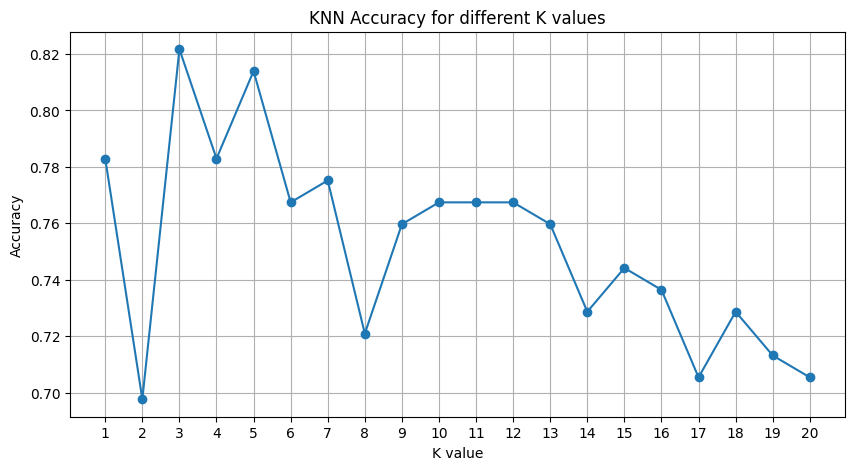

 Best K value: 3
 KNN best accuracy: 82.17%

 Classification Report:

              precision    recall  f1-score   support

       False       0.87      0.78      0.82        67
        True       0.78      0.87      0.82        62

    accuracy                           0.82       129
   macro avg       0.82      0.82      0.82       129
weighted avg       0.83      0.82      0.82       129



In [ ]:

model_accuracies = {}

scoreListknn = []
for i in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    score = knn_model.score(X_test, y_test)
    scoreListknn.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), scoreListknn, marker='o')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different K values")
plt.grid()
plt.show()

best_k = np.argmax(scoreListknn) + 1
best_accuracy = scoreListknn[best_k - 1]

print(f" Best K value: {best_k}")
print(" KNN best accuracy: {:.2f}%".format(best_accuracy * 100))

best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)
y_pred = best_knn_model.predict(X_test)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

model_accuracies["KNN"] = best_accuracy


 Best max_leaf_nodes: 24
 Best Accuracy: 82.95%


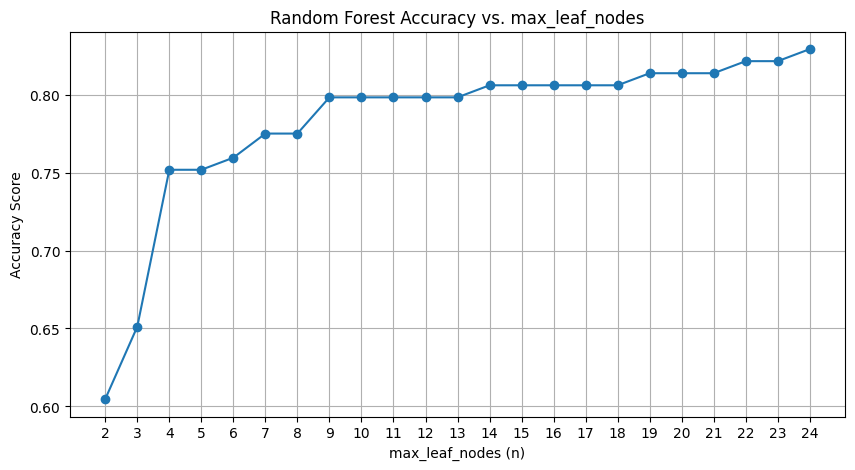


🔍 Classification Report:

              precision    recall  f1-score   support

       False       0.86      0.81      0.83        67
        True       0.80      0.85      0.83        62

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129



In [3839]:
scoreListRF = []
models = []

for i in range(2, 25):
    RFclassifier = RandomForestClassifier(n_estimators=100, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    score = RFclassifier.score(X_test, y_test)
    scoreListRF.append(score)
    models.append(RFclassifier)

best_score = max(scoreListRF)
best_n = np.argmax(scoreListRF) + 2
best_model = models[np.argmax(scoreListRF)]

y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f" Best max_leaf_nodes: {best_n}")
print(" Best Accuracy: {:.2f}%".format(acc * 100))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), scoreListRF, marker='o')
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("max_leaf_nodes (n)")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Accuracy vs. max_leaf_nodes")
plt.grid(True)
plt.show()

print("\n🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))


model_accuracies["Random Forest"] = acc



In [3840]:
log_model = LogisticRegression(solver='saga', max_iter=500, random_state=1)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)

print(" Logistic Regression")
print("Accuracy: {:.2f}%".format(acc_log * 100))
print("Classification Report:\n")
print(classification_report(y_test, y_pred_log))

model_accuracies["LogisticRegression"] = acc_log



 Logistic Regression
Accuracy: 80.62%
Classification Report:

              precision    recall  f1-score   support

       False       0.94      0.67      0.78        67
        True       0.73      0.95      0.83        62

    accuracy                           0.81       129
   macro avg       0.83      0.81      0.80       129
weighted avg       0.84      0.81      0.80       129



In [3841]:
dt_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=1), dt_grid, cv=5)
dt_cv.fit(X_train, y_train)

best_dt_model = dt_cv.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(" Decision Tree (Best Parameters)")
print("Best Params:", dt_cv.best_params_)
print("Accuracy: {:.2f}%".format(acc_dt * 100))
print("Classification Report:\n")
print(classification_report(y_test, y_pred_dt))

model_accuracies["Decision Tree"] = acc_dt



 Decision Tree (Best Parameters)
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 82.17%
Classification Report:

              precision    recall  f1-score   support

       False       0.81      0.87      0.83        67
        True       0.84      0.77      0.81        62

    accuracy                           0.82       129
   macro avg       0.82      0.82      0.82       129
weighted avg       0.82      0.82      0.82       129



In [3842]:
print("\n Model Accuracy Comparison (Sorted):\n")
for model, acc in sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc * 100:.2f}%")



 Model Accuracy Comparison (Sorted):

Random Forest: 82.95%
KNN: 82.17%
Decision Tree: 82.17%
LogisticRegression: 80.62%


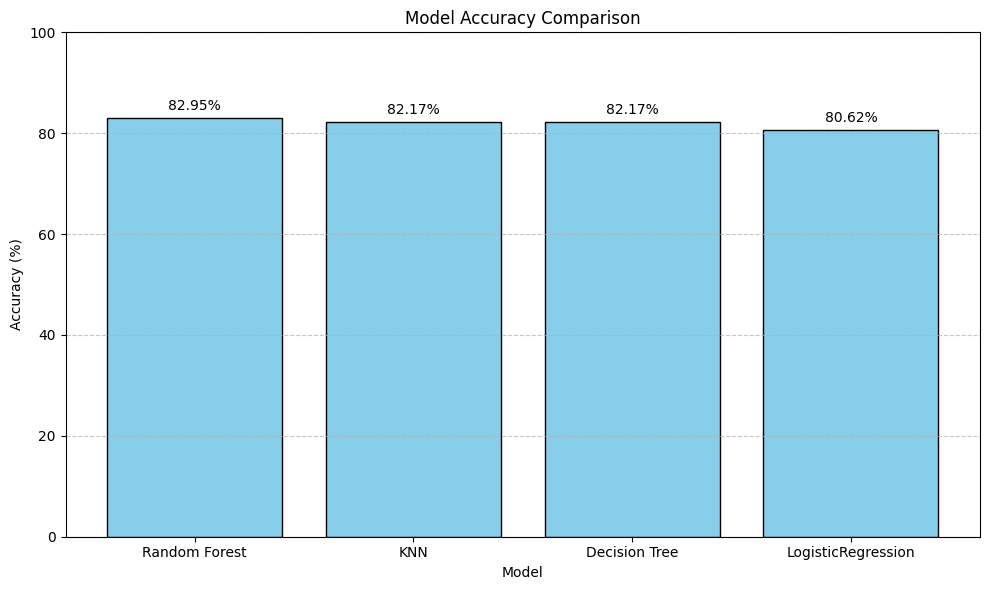

In [3843]:
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

models = [model for model, _ in sorted_accuracies]
accuracies = [acc * 100 for _, acc in sorted_accuracies]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
